In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('equipment_tuning_dataset.csv')
print(df.head())
df.info(); df.describe(include='all')

          F1         F2        F3         F4        F5          F6   F7 F8  \
0  54.967142  38.432217  0.570613  30.050647 -0.339008   91.454516  S07  C   
1  48.617357  48.186940  0.968185  30.815948 -0.362731   94.632581  S06  A   
2  56.476885  13.501745 -0.331308  40.150344 -1.436515  139.568226  S05  C   
3  65.230299  39.186232 -0.612237  36.897056 -0.264072  104.528101  S08  C   
4  47.658466  57.538313 -1.085151  25.133828  0.586263   94.205163  S05  A   

         F9 F10  F11       F12 Needs_Tuning  
0  0.302294  Z2    0  5.118287          Yes  
1  0.948185  Z1    0  4.204698           No  
2  0.595286  Z2    1  6.437193          Yes  
3  0.469348  Z3    1  4.680284           No  
4  0.783041  Z2    1  3.820761           No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   F1            1250 non-null   float64
 1   F2            

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,Needs_Tuning
count,1250.000000,1250.000000,1154.000000,1250.000000,1250.000000,1250.000000,1250,1250,1166.000000,1250,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,4,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,S08,B,NaN,Z2,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,135,433,NaN,351,NaN,NaN,699
mean,50.377088,40.008520,0.001929,29.939434,-0.007571,99.639747,NaN,NaN,0.496415,NaN,0.393600,4.932048,NaN
std,9.888929,29.779004,1.032088,7.931443,1.299155,15.641065,NaN,NaN,0.189756,NaN,0.488743,2.009101,NaN
min,17.587327,8.509809,-2.991136,2.810627,-8.982136,51.684755,NaN,NaN,0.000000,NaN,0.000000,-2.514871,NaN
25%,43.623482,25.130379,-0.712209,24.761290,-0.577992,88.936602,NaN,NaN,0.367878,NaN,0.000000,3.605815,NaN
50%,50.446917,33.708265,0.000185,29.827150,-0.032091,99.380286,NaN,NaN,0.496255,NaN,0.000000,4.967375,NaN
75%,56.612341,46.125163,0.678943,35.274016,0.524421,110.526491,NaN,NaN,0.625014,NaN,1.000000,6.339384,NaN


# 1. Exploratory Data Analysis (EDA)
Identify missing values and outliers, visualize distributions, and analyze class balance.

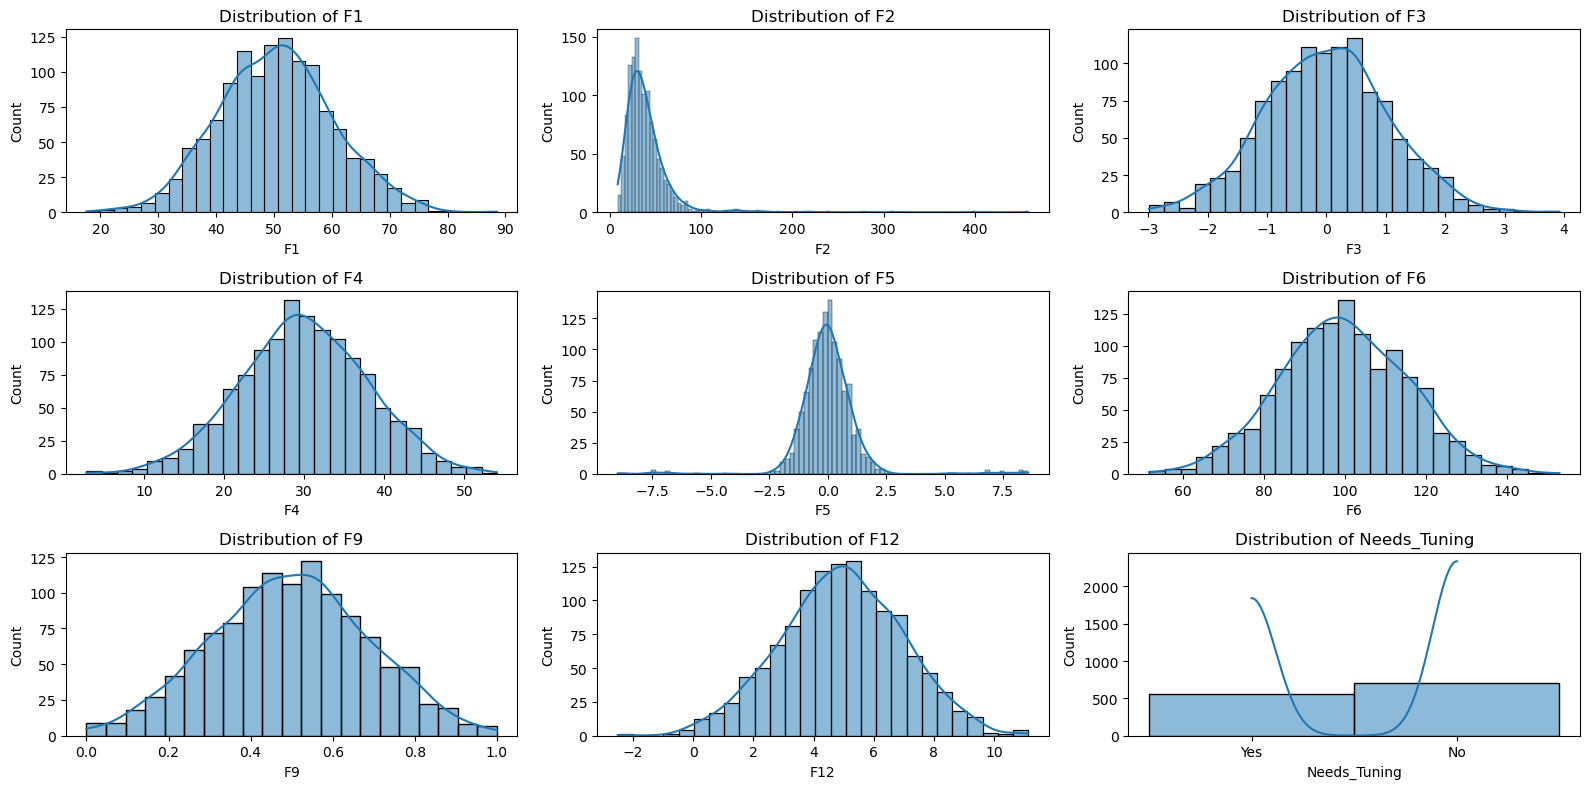

In [18]:
# Visualize distributions
df_numeric = df[["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12", "Needs_Tuning"]]

fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()


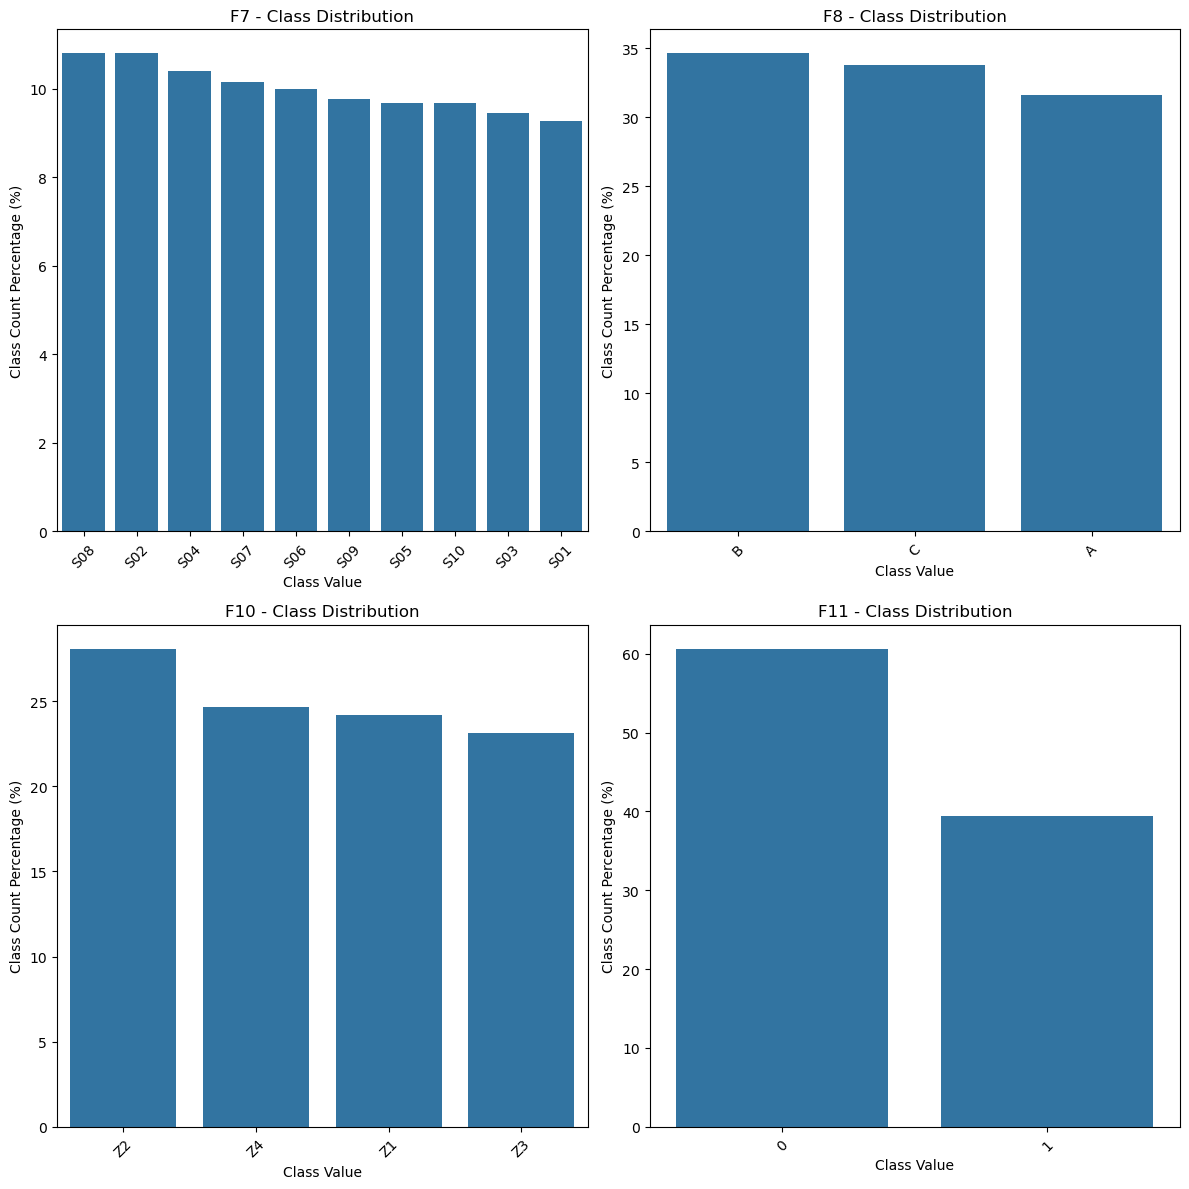

In [19]:
# analyze class balance
df_cat = df[["F7", "F8", "F10", "F11"]]

# Plot category density
# fig_1, axes_1 = plt.subplots(2, 2, figsize=(12, 12))
# axes_1 = axes_1.flatten()

# for idx, feature in enumerate(df_cat.columns):
#     # Plot category density
#     sns.countplot(x=df_cat[feature], ax=axes_1[idx])
#     axes_1[idx].set_title(f'{feature} - Class Density')
#     axes_1[idx].set_xlabel('Class Value')
#     axes_1[idx].set_ylabel('Density')
#     axes_1[idx].tick_params(axis='x', rotation=45)
# plt.tight_layout()
# plt.show()

# Plot category distribution
fig_2, axes_2 = plt.subplots(2, 2, figsize=(12, 12))
axes_2 = axes_2.flatten()
for idx, feature in enumerate(df_cat.columns):
    class_count_percent = df_cat[feature].value_counts() / len(df_cat) * 100
    
    sns.barplot(x=class_count_percent.index, y=class_count_percent.values, ax=axes_2[idx])
    axes_2[idx].set_title(f'{feature} - Class Distribution')
    axes_2[idx].set_xlabel('Class Value')
    axes_2[idx].set_ylabel('Class Count Percentage (%)')
    axes_2[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



F1              0.0000
F2              0.0000
F3              0.0768
F4              0.0000
F5              0.0000
F6              0.0000
F7              0.0000
F8              0.0000
F9              0.0672
F10             0.0000
F11             0.0000
F12             0.0000
Needs_Tuning    0.0000
dtype: float64
F1: 10 outliers (IQR fences 24.14..76.10)
F2: 57 outliers (IQR fences -6.36..77.62)
F3: 9 outliers (IQR fences -2.80..2.77)
F4: 10 outliers (IQR fences 8.99..51.04)
F5: 32 outliers (IQR fences -2.23..2.18)
F6: 7 outliers (IQR fences 56.55..142.91)
F9: 0 outliers (IQR fences -0.02..1.01)
F12: 6 outliers (IQR fences -0.49..10.44)


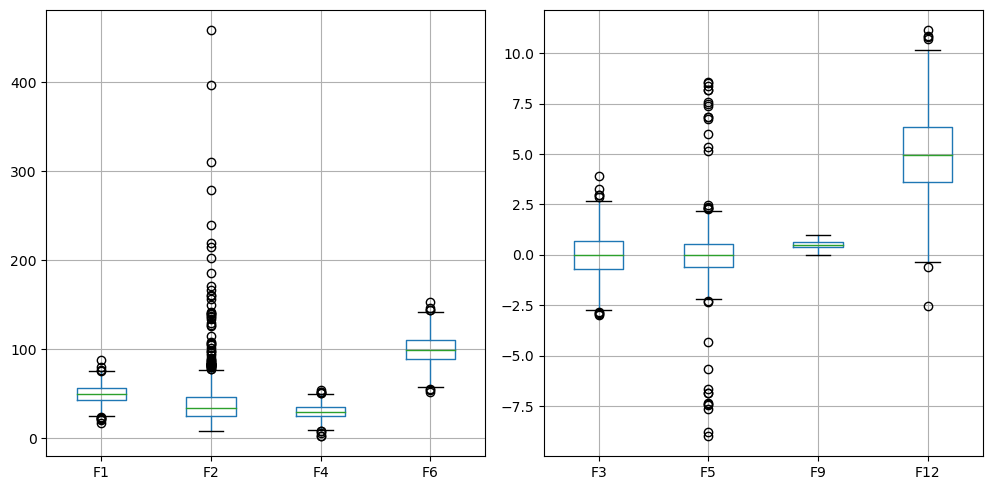

In [20]:
# Identify missing values and outliers
print(df.isna().mean()) # fraction missing per column

# Outliers
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (s < lower) | (s > upper), (lower, upper)

for c in ["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]:
    mask, (lo, hi) = iqr_mask(df[c])
    print(f'{c}: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df[[ 'F1', 'F2', 'F4', 'F6']].boxplot()

plt.subplot(1,3,2)
df[[ 'F3', 'F5', 'F9', 'F12']].boxplot()

plt.tight_layout()
plt.show()

# Data Preprocessing: Handle missing data, encode categorical variables, normalize or scale features, and justify preprocessing steps.

In [21]:
# Handle missing values
# F3 and F9 don't have a significant skew towards either directions and forms a bell-shaped curve indicating that the distirbution is normal
# and mean would be an acceptable imputation method
print(df.isna().mean())

df_filled = df
df_filled['F3'] = df['F3'].fillna(df['F3'].mean())
df_filled['F9'] = df['F9'].fillna(df['F9'].mean())

print(df_filled.isna().mean())

F1              0.0000
F2              0.0000
F3              0.0768
F4              0.0000
F5              0.0000
F6              0.0000
F7              0.0000
F8              0.0000
F9              0.0672
F10             0.0000
F11             0.0000
F12             0.0000
Needs_Tuning    0.0000
dtype: float64
F1              0.0
F2              0.0
F3              0.0
F4              0.0
F5              0.0
F6              0.0
F7              0.0
F8              0.0
F9              0.0
F10             0.0
F11             0.0
F12             0.0
Needs_Tuning    0.0
dtype: float64


In [29]:
# Remove Outliers
df_outliers_present = df_filled.copy()
df_outliers_winsored = df_filled.copy()
df_outliers_removed = df_filled.copy()

# Winsorize outliers
for c in ["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]:
    mask, (lo, hi) = iqr_mask(df_outliers_winsored[c])
    print(f'{c}: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')
    # Winsorize: clip to inner fences
    df_outliers_winsored[c] = df_outliers_winsored[c].clip(lo, hi)

print("\n")

# Trim outliers
combined_mask = pd.Series(False, index=df_outliers_removed.index)

for c in ["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]:
    mask, (lo, hi) = iqr_mask(df_outliers_removed[c])
    print(f'{c}: {mask.sum()} outliers (IQR fences {lo:.2f}..{hi:.2f})')
    combined_mask = combined_mask | mask

# remove rows with outliers
df_outliers_removed = df_outliers_removed[~combined_mask].reset_index(drop=True)


F1: 10 outliers (IQR fences 24.14..76.10)
F2: 57 outliers (IQR fences -6.36..77.62)
F3: 21 outliers (IQR fences -2.47..2.44)
F4: 10 outliers (IQR fences 8.99..51.04)
F5: 32 outliers (IQR fences -2.23..2.18)
F6: 7 outliers (IQR fences 56.55..142.91)
F9: 13 outliers (IQR fences 0.03..0.97)
F12: 6 outliers (IQR fences -0.49..10.44)


F1: 10 outliers (IQR fences 24.14..76.10)
F2: 57 outliers (IQR fences -6.36..77.62)
F3: 21 outliers (IQR fences -2.47..2.44)
F4: 10 outliers (IQR fences 8.99..51.04)
F5: 32 outliers (IQR fences -2.23..2.18)
F6: 7 outliers (IQR fences 56.55..142.91)
F9: 13 outliers (IQR fences 0.03..0.97)
F12: 6 outliers (IQR fences -0.49..10.44)


In [23]:
# Normalize or scale features
from sklearn.preprocessing import StandardScaler

df_outliers_present_numeric = df_outliers_present[["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]]
df_outliers_winsored_numeric = df_outliers_winsored[["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]]
df_outliers_removed_numeric = df_outliers_removed[["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]]

std_scaler = StandardScaler()

# scale df with outliers present
df_scaled_outliers_present = std_scaler.fit_transform(df_outliers_present_numeric.to_numpy())
df_scaled_outliers_present = pd.DataFrame(df_scaled_outliers_present, columns=[
  "F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"])

# scale df with outliers winsorized
df_scaled_outliers_winsored = std_scaler.fit_transform(df_outliers_winsored_numeric.to_numpy())
df_scaled_outliers_winsored = pd.DataFrame(df_scaled_outliers_winsored, columns=[
  "F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"])

#scale df with outliers removed
df_scaled_outliers_removed = std_scaler.fit_transform(df_outliers_removed_numeric.to_numpy())
df_scaled_outliers_removed = pd.DataFrame(df_scaled_outliers_removed, columns=[
  "F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"])

# print(df_scaled_outliers_present.head())
# print(df_scaled_outliers_winsored.head())
# print(df_scaled_outliers_removed.head())

In [24]:
# Encode categorical variables

from sklearn.model_selection import train_test_split

df_scaled_outliers_present_cat = df_outliers_present[["F7", "F8", "F10", "F11"]]
df_outliers_winsored_cat = df_outliers_winsored[["F7", "F8", "F10", "F11"]]
df_outliers_removed_cat = df_outliers_removed[["F7", "F8", "F10", "F11"]]

# print(df_outliers_winsored_cat.head(5))
# print(df_scaled_outliers_winsored.head(5))

df_combined_present = pd.concat([df_scaled_outliers_present, df_scaled_outliers_present_cat], axis=1)
df_combined_winsored = pd.concat([df_scaled_outliers_winsored, df_outliers_winsored_cat], axis=1)
df_combined_removed = pd.concat([df_scaled_outliers_removed, df_outliers_removed_cat], axis=1)

# print(df_combined.head(20))

# Outliers present
X_1 = df_combined_present
y_1 = df_outliers_present['Needs_Tuning']
X_1 = pd.get_dummies(X_1, drop_first=True)

# Outliers winsored
X_2 = df_combined_winsored
y_2 = df_outliers_winsored['Needs_Tuning']
X_2 = pd.get_dummies(X_2, drop_first=True)

#Outliers removed
X_3 = df_combined_removed
y_3 = df_outliers_removed['Needs_Tuning']
X_3 = pd.get_dummies(X_3, drop_first=True)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
# random_state=42)

# 3. Model Training: Implement and evaluate the following models:
- k-Nearest Neighbors (kNN)
- Na ̈ıve Bayes
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- Logistic Regression
- Multi-Layer Perceptron (MLP)

In [25]:
# Models (fit/score pattern)
# Model training WITHOUT test/train split for comparison to later split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as MLP

models = { 
    'KNN': Pipeline([('sc', StandardScaler(with_mean=False)), ('mdl', KNN())]),
    'NB' : GaussianNB(),
    'SVM': Pipeline([('sc', StandardScaler(with_mean=False)), ('mdl', SVC())]),
    'DT' : DT(), 
    'RF' : RF(n_estimators=200, random_state=42),
    'LR' : Pipeline([('sc', StandardScaler(with_mean=False)), ('mdl', LR(max_iter=1000))]),
    'MLP': Pipeline([('sc', StandardScaler(with_mean=False)), ('mdl', MLP(max_iter=500, random_state=42))]) 
}

results_1_no_split = {}
results_2_no_split = {}
results_3_no_split = {}

for name, model in models.items():
    model.fit(X_1, y_1)

    y_pred_1 = model.predict(X_1)

    acc_1 = accuracy_score(y_1, y_pred_1)

    results_1_no_split[name] = round(acc_1, 4)  

for name, model in models.items():
    model.fit(X_2, y_2)

    y_pred_2 = model.predict(X_2)

    acc_2 = accuracy_score(y_2, y_pred_2)

    results_2_no_split[name] = round(acc_2, 4) 

for name, model in models.items():
    model.fit(X_3, y_3)

    y_pred_3 = model.predict(X_3)

    acc_3 = accuracy_score(y_3, y_pred_3)

    results_3_no_split[name] = round(acc_3, 4)

print("======No Test Train Split======")
print(f"Outliers Present: {results_1_no_split}")
print(f"Outliers Winsorised: {results_2_no_split}")
print(f"Outliers Removed: {results_3_no_split}")

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


======No Test Train Split======
Outliers Present: {'KNN': 0.704, 'NB': 0.6456, 'SVM': 0.7528, 'DT': 1.0, 'RF': 1.0, 'LR': 0.6336, 'MLP': 0.976}
Outliers Winsorised: {'KNN': 0.7104, 'NB': 0.656, 'SVM': 0.7648, 'DT': 1.0, 'RF': 1.0, 'LR': 0.6304, 'MLP': 0.9816}
Outliers Removed: {'KNN': 0.7116, 'NB': 0.642, 'SVM': 0.7595, 'DT': 1.0, 'RF': 1.0, 'LR': 0.6239, 'MLP': 0.9946}


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4. Validation: Use both train/test split and 5-fold cross-validation to compare accuracy.

In [26]:
# Re-train with test/train split present for comparison
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, stratify=y_1,
random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, stratify=y_2,
random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, stratify=y_3,
random_state=42)

results_1_split = {}
results_2_split = {}
results_3_split = {}

for name, model in models.items():
    model.fit(X_train_1, y_train_1)

    y_pred_1 = model.predict(X_test_1)

    acc_1 = accuracy_score(y_test_1, y_pred_1)

    results_1_split[name] = round(acc_1, 4)  

for name, model in models.items():
    model.fit(X_train_2, y_train_2)

    y_pred_2 = model.predict(X_test_2)

    acc_2 = accuracy_score(y_test_2, y_pred_2)

    results_2_split[name] = round(acc_2, 4) 

for name, model in models.items():
    model.fit(X_train_3, y_train_3)

    y_pred_3 = model.predict(X_test_3)

    acc_3 = accuracy_score(y_test_3, y_pred_3)

    results_3_split[name] = round(acc_3, 4)

print("======Used Test Train Split======")
print(f"Outliers Present: {results_1_split}")
print(f"Outliers Winsorised: {results_2_split}")
print(f"Outliers Removed: {results_3_split}")


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


======Used Test Train Split======
Outliers Present: {'KNN': 0.54, 'NB': 0.648, 'SVM': 0.628, 'DT': 0.588, 'RF': 0.632, 'LR': 0.624, 'MLP': 0.576}
Outliers Winsorised: {'KNN': 0.548, 'NB': 0.632, 'SVM': 0.632, 'DT': 0.636, 'RF': 0.644, 'LR': 0.624, 'MLP': 0.564}
Outliers Removed: {'KNN': 0.527, 'NB': 0.5856, 'SVM': 0.6171, 'DT': 0.5541, 'RF': 0.6261, 'LR': 0.6396, 'MLP': 0.5766}


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# Cross Validation & Box Plot
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores_1 = {name: cross_val_score(mdl, X_1, y_1, cv=5, scoring='accuracy') for name, mdl in
models.items()}
scores_2 = {name: cross_val_score(mdl, X_2, y_2, cv=5, scoring='accuracy') for name, mdl in
models.items()}
scores_3 = {name: cross_val_score(mdl, X_3, y_3, cv=5, scoring='accuracy') for name, mdl in
models.items()}


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

# 5. Visualization: Create a box plot of accuracies for all models.

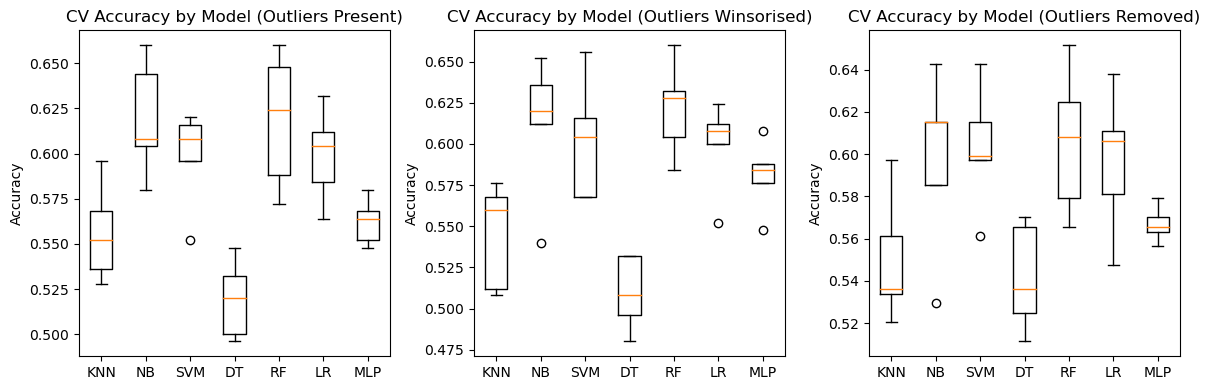

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(scores_1.values(), labels=scores_1.keys())
plt.ylabel('Accuracy')
plt.title('CV Accuracy by Model (Outliers Present)')

plt.subplot(1, 3, 2)
plt.boxplot(scores_2.values(), labels=scores_2.keys())
plt.ylabel('Accuracy')
plt.title('CV Accuracy by Model (Outliers Winsorised)')

plt.subplot(1, 3, 3)
plt.boxplot(scores_3.values(), labels=scores_3.keys())
plt.ylabel('Accuracy')
plt.title('CV Accuracy by Model (Outliers Removed)')

plt.tight_layout()
plt.show()

# 6. Discussion: Analyze which preprocessing and model choices led to higher accuracy, and discuss trade-offs in interpretability and complexity.

- Pre-processing made a significant impact in two areas: outlier-handling and the test-train split
    - Models were trained with and without a test-train split; from the accuracy metrics of each of these models
        - the models without a test-train split saw a much higher degree of accuracy,
        - however this is likely due to overfitting from the lack of test-train split,
        - rather than a reflection of the actual accuracy of the model, as without the split,
        - Random Forest and Decision Tree both achieve an accuracy of 1.0, or perfect accuracy, which is practically impossible
    - 3 forms of outlier-handling were implemented: no handling (outliers present), winsorisation, and trimming
    - these 3 methods were applied to both datasets with a test-train split and those without
    - Un-split dataset:
        - accuracy was fairly similar across all three methods,
        - trimming had a slightly higher KNN and MLP accuracy
        - winsorisation had slightly higher accuracy in all other models
        - this indicates some form of outlier handling improves accuracy over no handling
    - Split dataset:
        - accuracy remained fairly similar acorss all 3 methids
        - winsorisation showed the accuracy across the majority of the models, including KNN, SVM, DT, RF and LR
        - no-handling had the highest accuracy for naive bayes
        - trimming had the highest accuracy for logistic regression and MLP
        - from these findings, it can be concluded that winsorisation is the best technique for maximizing accuracy, regardless of test-train split
- The trade-off between accuracy and interpretability & complexity is a frequently
- discussed issue in ML, although it dosen't appear to be highly relevant to the case at hand
    - Comparing the highest accuracy scores between inherently interpretable models (KNN, NB, DT, LR) and
    - non-inherently interpretable models (SVM, RF, MLP)
    - Within the datasets which included a train-test split, there appears to be an even
    - disitribution of highest accuracy scores between interpretable and non-interpretable models
        - the highest accuracy for non-handling is NB
        - the highest accuracy for winsorising is RF
        - the highest accuracy for trimming is logistic regression
    - Additonally, most accuracy scores were within a range of +- .1 or less when compared to the highest accuracy score,
    - showing a low variance of accuracy scores, which indicates that there is not a significant trade off in accuracy to interpretablity
- Ultimatley there will always be some degree of trade-off between interpretability and complexity, as generally,
- as any concept in any domain becomes more complex, it becomes more difficult to understand.
- On the contrary, non-inherently interpretable models like SVM or MLP can be made interpretable
- with the assistance of tools like LIME or SHAP, which provide explanations of these models decisions, helping to mitigate the trade-off.